In [3]:
#importing all the necessarry libraries

In [68]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [157]:
df = pd.read_csv("D:/p2/train.csv")  # using pandas to read the csv files

In [158]:
test_df = pd.read_csv("D:/ola/test.csv")

In [159]:
df.info()  # this info gives us the total columns and their datatype with total number of entries in it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048049 entries, 0 to 1048048
Data columns (total 17 columns):
ID                    1048049 non-null int64
vendor_id             1048049 non-null int64
pickup_loc            1048049 non-null int64
drop_loc              1048049 non-null int64
driver_tip            1048049 non-null float64
mta_tax               1048049 non-null float64
distance              1048049 non-null float64
pickup_time           1048049 non-null object
drop_time             1048049 non-null object
num_passengers        1048049 non-null int64
toll_amount           1048049 non-null float64
payment_method        1048049 non-null int64
rate_code             1048049 non-null int64
stored_flag           1048049 non-null object
extra_charges         1048049 non-null float64
improvement_charge    1048049 non-null float64
total_amount          1048049 non-null float64
dtypes: float64(7), int64(7), object(3)
memory usage: 135.9+ MB


In [160]:
df.head(n=5)

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,total_amount
0,0,1,170,233,1.83,0.5,0.70,04-04-2017 17:59,04-04-2017 18:05,1,0.0,1,1,N,1.0,0.3,9.13
1,1,2,151,243,3.56,0.5,4.64,04-03-2017 19:03,04-03-2017 19:20,1,0.0,1,1,N,1.0,0.3,21.36
2,2,2,68,90,1.50,0.5,1.29,04-03-2017 15:06,04-03-2017 15:12,2,0.0,1,1,N,0.0,0.3,8.80
3,3,2,142,234,1.50,0.5,2.74,04-04-2017 08:10,04-04-2017 08:27,1,0.0,1,1,N,0.0,0.3,14.80
4,4,2,238,238,0.00,0.5,0.45,04-05-2017 14:02,04-05-2017 14:05,6,0.0,2,1,N,0.0,0.3,4.80


In [161]:
def data_preprocess(df):
    
    '''pickup_time is taken into conisderation and day ,month , hour , min have been 
    extracted out from it using the below list comprehension and vectorisation technique '''
    
    pickup = df['pickup_time'].values[np.arange(df.values.shape[0])]
    droptime = df['drop_time'].values[np.arange(df.values.shape[0])]
    
    df["hour"] = pd.DataFrame([24-int(date[11:13]) if date[-1:-3]=='PM' else int(date[11:13]) for date in pickup])
    df['min'] = pd.DataFrame([int(date[14:16]) for date in pickup])
    #df['day'] = pd.DataFrame([int(date[3:5]) for date in pickup])
    #df['month'] = pd.DataFrame([int(date[0:2]) for date in pickup])
    df['drop_min'] = pd.DataFrame([int(date[14:16]) for date in droptime])
    #df['drop_day'] = pd.DataFrame([int(date[3:5]) for date in droptime])
    #df['drop_month'] = pd.DataFrame([int(date[0:2]) for date in droptime])
    df['drop_hour'] = pd.DataFrame([24-int(date[11:13]) if date[-1:-3]=='PM' else int(date[11:13]) for date in droptime])
    # duration column is added 
    df['duration'] = (df['drop_hour']-df['hour'])*60 + df['drop_min'] - df['min']
    # label encoder is used to to convert the stored_flag entries into numerical form to do mathematical operations 
    le = LabelEncoder()
    df['stored_flag'] = le.fit_transform(df['stored_flag'])
    
    '''There are some columns which are not needed so it is better to drop them as they won't contribute
        significantly towards the result . Drop function is used to drop the columns'''
    
    non_useful_features = ['ID','mta_tax','pickup_time','drop_time','min','drop_min']
    df = df.drop(non_useful_features,axis=1)
    
    # filtered dataframe is returned
    return(df)

In [162]:
# here X_train and Y_train has been obtained after all the data preprocessing stuff
train = data_preprocess(df)
Y_train = train['total_amount']

In [163]:
train.head()

,vendor_id,pickup_loc,drop_loc,driver_tip,distance,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,total_amount,hour,drop_hour
0,1,170,233,1.83,0.70,1,0.0,1,1,0,1.0,0.3,9.13,17,18
1,2,151,243,3.56,4.64,1,0.0,1,1,0,1.0,0.3,21.36,19,19
2,2,68,90,1.50,1.29,2,0.0,1,1,0,0.0,0.3,8.80,15,15
3,2,142,234,1.50,2.74,1,0.0,1,1,0,0.0,0.3,14.80,8,8
4,2,238,238,0.00,0.45,6,0.0,2,1,0,0.0,0.3,4.80,14,14


In [164]:
# test data has been preprocessed 
X_test = data_preprocess(test_df)

# GRAPHICAL REPRESENTATION

In [122]:
import seaborn as sns

In [123]:
import matplotlib.pyplot as plt

In [124]:
plt.style.use("seaborn")

Text(0.5, 1.0, 'Variation of Fare with Duration')

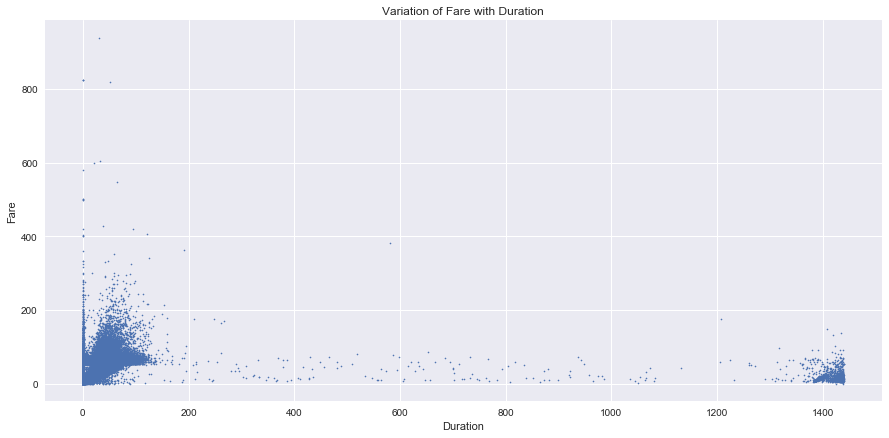

In [126]:
plt.figure(figsize=(15,7))
plt.scatter(train['duration'].values, Y_train.values, s=1.5)
plt.xlabel('Duration')
plt.ylabel('Fare')
plt.title("Variation of Fare with Duration")

Some of the durations are quite big and fare is very low for them , this means that they are outliers , they are part of misleading data as it is impossible to have fare around 16-20 rupees and having travel duration around 1440 mins i.e a day. This is the inference of the above graph

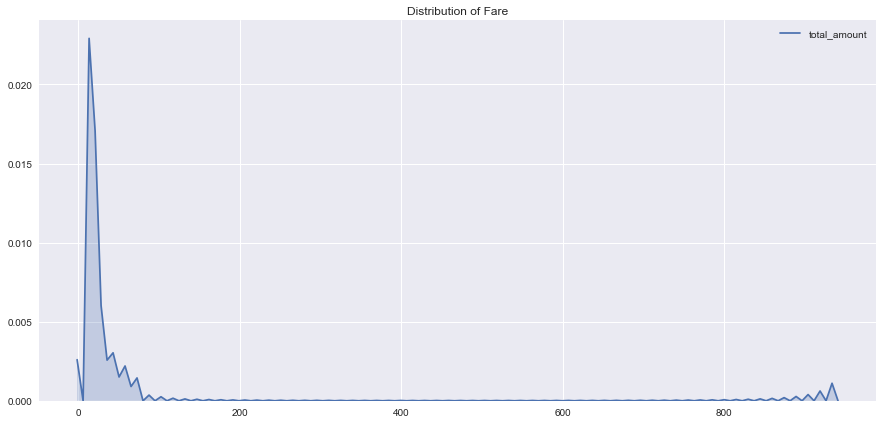

In [212]:
plt.figure(figsize=(15,7))
sns.kdeplot(Y_train,shade=True)
plt.title("Distribution of Fare")
plt.show()

From the above graph we can see that the fare is mainly distributed in the range 0 to 60-70 and a bit (very very less) of in higher range like 500+.

Text(0.5, 1.0, 'Variation of Fare with Day')

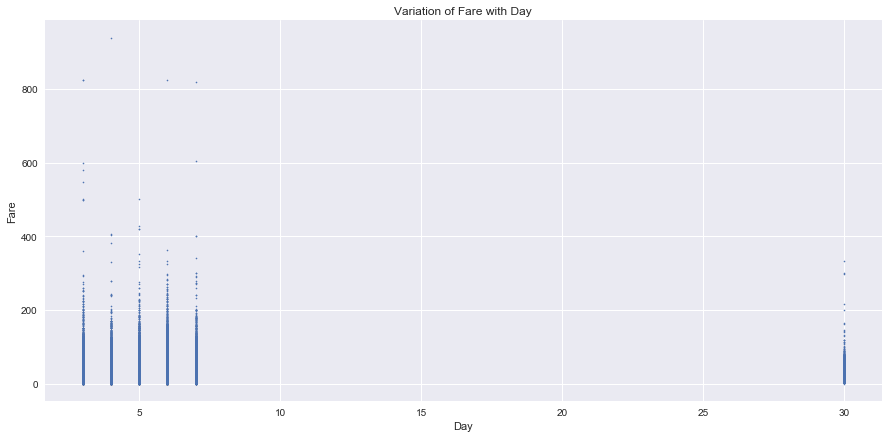

In [172]:
plt.figure(figsize=(15,7))
plt.scatter(X_train['day'].values, Y_train.values, s=1.5)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.title("Variation of Fare with Day")

We can see that only 3,4,5,6,7,30 are the days when the cab is running and fare is distributed evenly on these days.

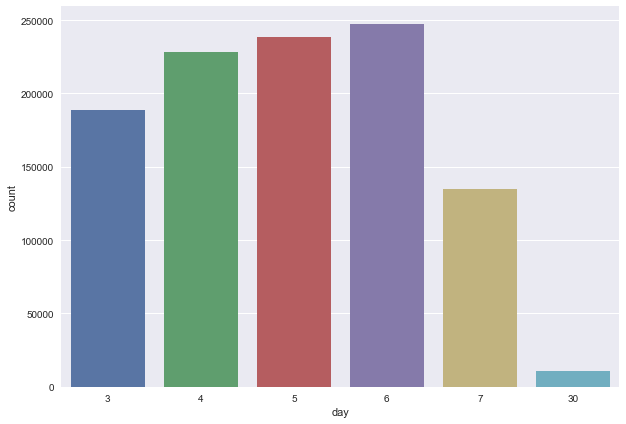

In [136]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x="day", data=X_train)

This graph basically shows us the rush day , i.e on which day of the month , the rides are maximum.

Text(0.5, 1.0, 'Frequency of Hours')

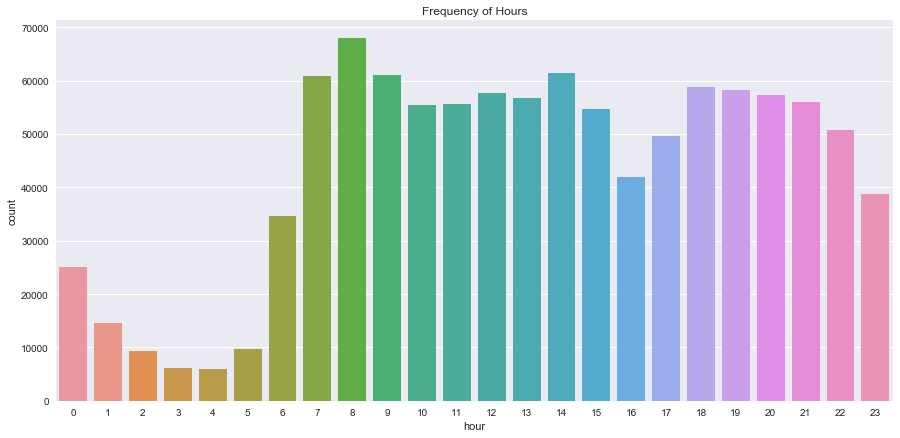

In [213]:
plt.figure(figsize=(15,7)) 
ax = sns.countplot(x="hour", data=X_train)
plt.title("Frequency of Hours")

This graph basically shows us the rush hour , i.e at which time of the day(24 hours format) the rides are maximum.

Text(0.5, 1.0, 'Variation of Fare with Hour')

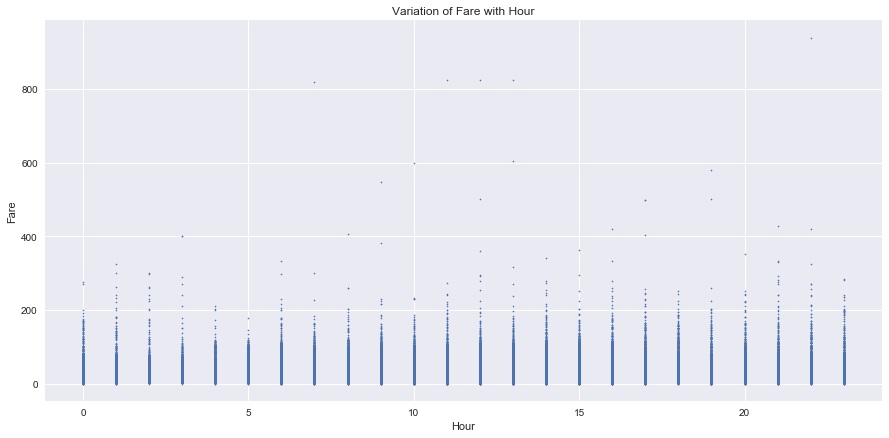

In [94]:
plt.figure(figsize=(15,7))
plt.scatter(X_train['hour'].values, Y_train.values, s=1.5)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.title("Variation of Fare with Hour")

This graph is basically used to see which hour is prime hour , i.e the fare at that time of the day is maximum , but from the graph we infered that the fare is evenly distributed for all the 24 hours.

Text(0.5, 1.0, 'Variation of Fare with numbers of Passengers')

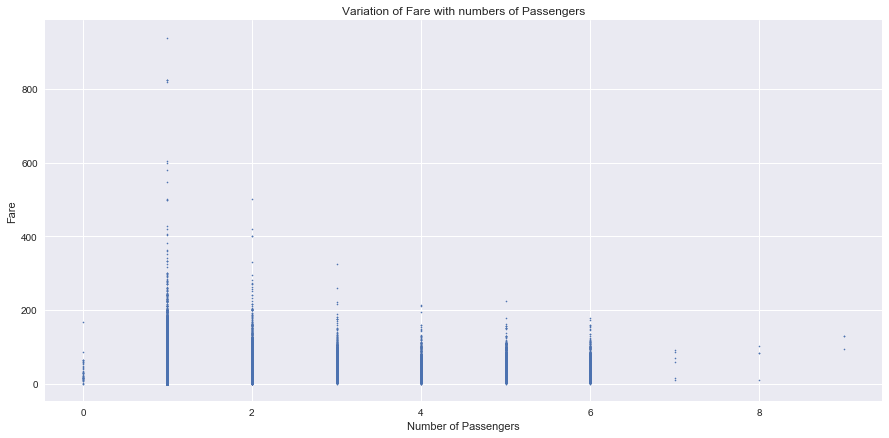

In [96]:
plt.figure(figsize=(15,7))
plt.scatter(X_train['num_passengers'].values, Y_train.values, s=1.5)
plt.xlabel('Number of Passengers')
plt.ylabel('Fare')
plt.title("Variation of Fare with numbers of Passengers")

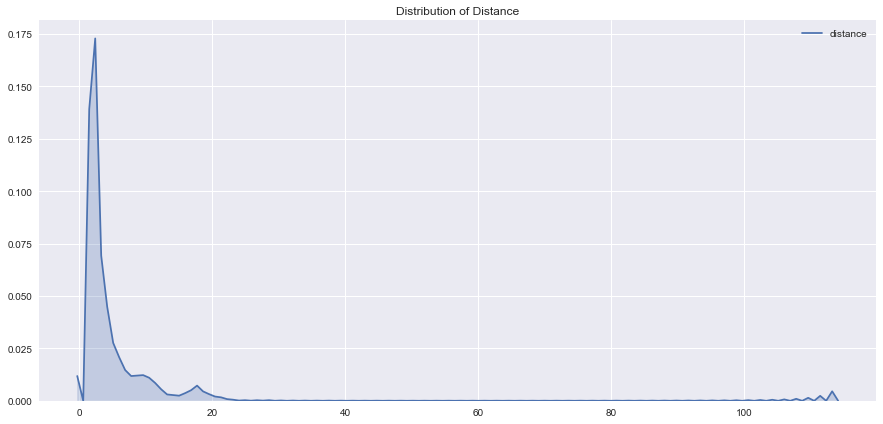

In [211]:
plt.figure(figsize=(15,7))
sns.kdeplot(train['distance'],shade=True)
plt.title('Distribution of Distance')
plt.show()

Text(0.5, 1.0, 'Variation of Fare with Distance')

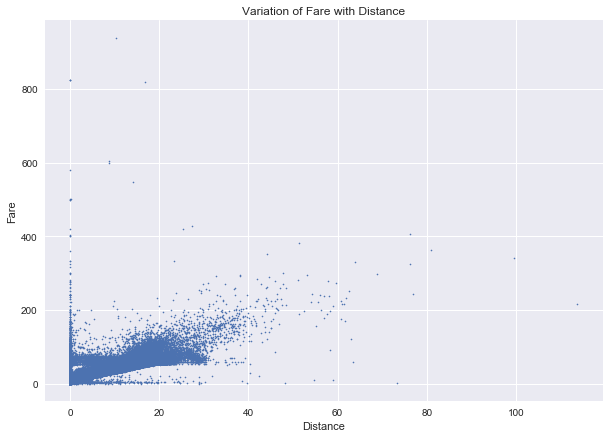

In [95]:
plt.figure(figsize=(10,7))
plt.scatter(X_train['distance'].values, Y_train.values, s=1.5)
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.title("Variation of Fare with Distance")

Text(0.5, 1.0, 'Variation of Distance with numbers of Passengers')

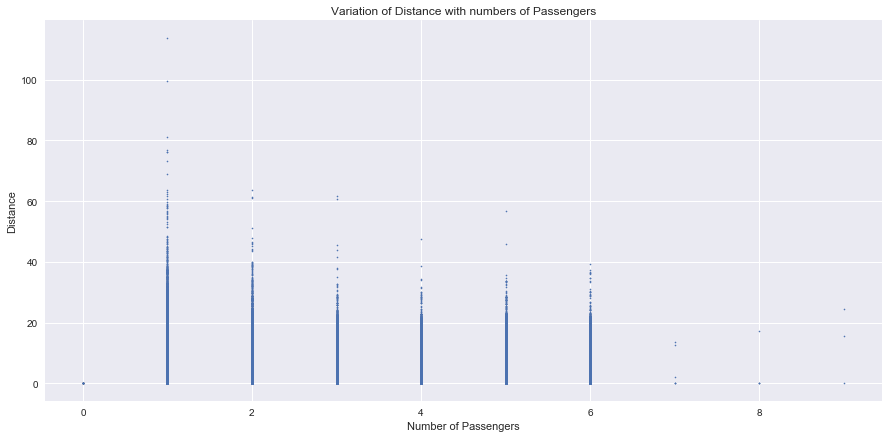

In [101]:
plt.figure(figsize=(15,7))
plt.scatter(X_train['num_passengers'].values, X_train['distance'], s=1.5)
plt.xlabel('Number of Passengers')
plt.ylabel('Distance')
plt.title("Variation of Distance with numbers of Passengers")

Above three graphs cumulatively showing how number of passengers , distance and fare are changing with each other.

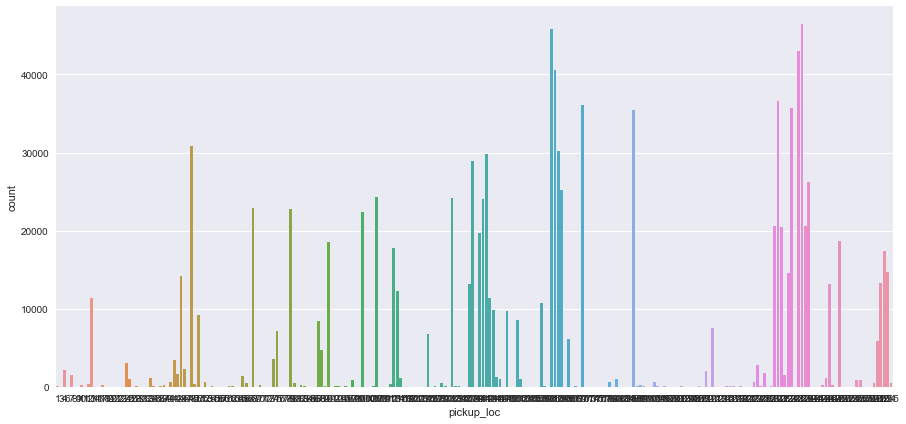

In [175]:
plt.figure(figsize=(15,7)) 
ax = sns.countplot(x="pickup_loc", data=X_train)

This graph shows which location is used most for pickup. High peaks means they may be a railway station or airport or any restraunt , mall etc.

Text(0.5, 1.0, 'Variation of Fare with pickup location')

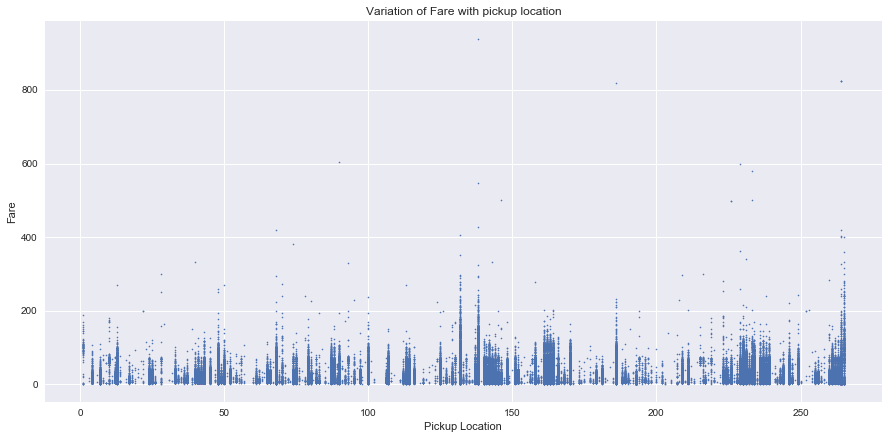

In [173]:
plt.figure(figsize=(15,7))
plt.scatter(X_train['pickup_loc'].values, Y_train.values, s=1.5)
plt.xlabel('Pickup Location')
plt.ylabel('Fare')
plt.title("Variation of Fare with pickup location")

This graph basically shows the variation of fare with the pick up location. i.e which pick up location costs how much.

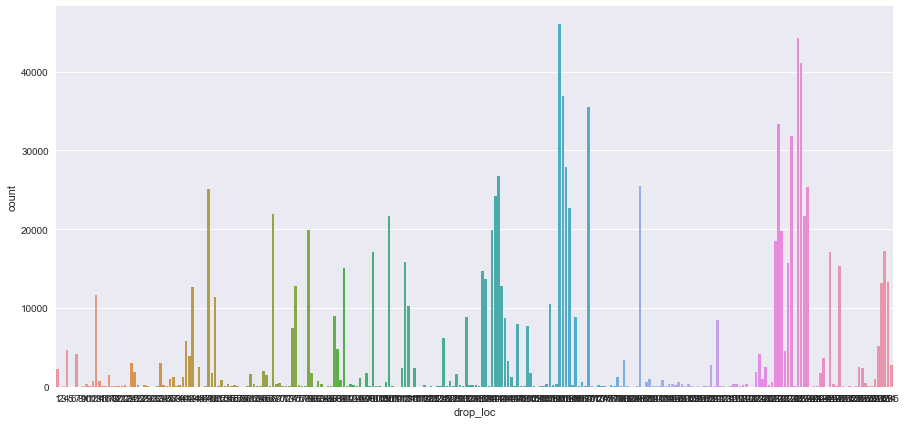

In [207]:
plt.figure(figsize=(15,7)) 
ax = sns.countplot(x="drop_loc", data=X_train)

This graphs depicts which locations are frequently used as drop locations

Text(0.5, 1.0, 'Variation of Fare with drop location')

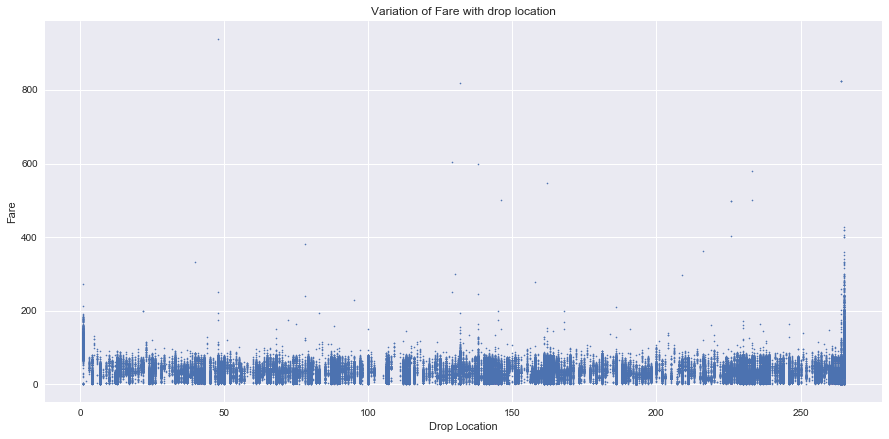

In [174]:
plt.figure(figsize=(15,7))
plt.scatter(X_train['drop_loc'].values, Y_train.values, s=1.5)
plt.xlabel('Drop Location')
plt.ylabel('Fare')
plt.title("Variation of Fare with drop location")

This graph depicts that approx all the drop locations have shared the fare evenly. Only few have drastic variations like we can see in the graph's extreme left and right.

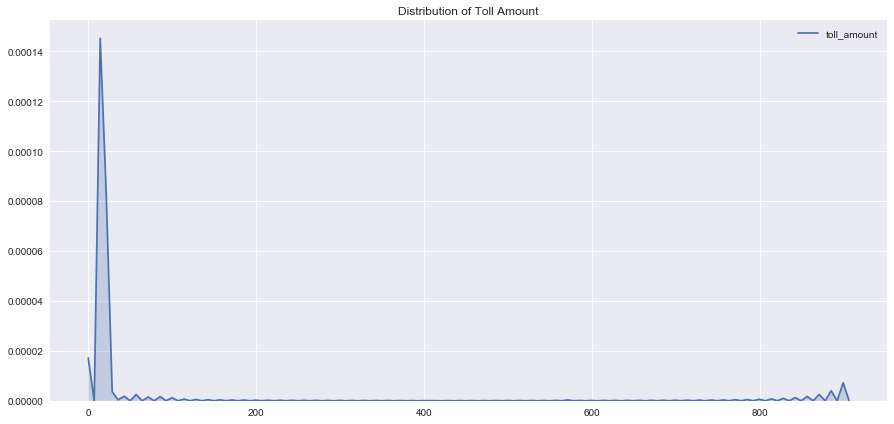

In [214]:
plt.figure(figsize=(15,7))
sns.kdeplot(train['toll_amount'],shade=True)
plt.title("Distribution of Toll Amount")
plt.show()

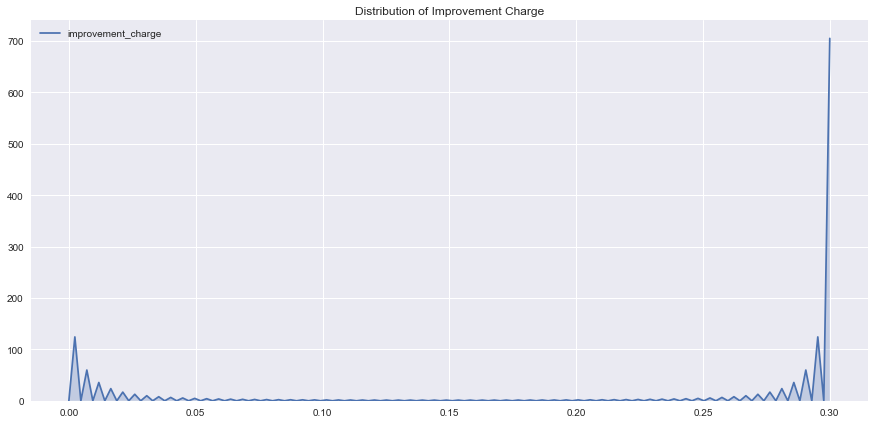

In [215]:
plt.figure(figsize=(15,7))
sns.kdeplot(train['improvement_charge'],shade=True)
plt.title("Distribution of Improvement Charge")
plt.show()

In [138]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048049 entries, 0 to 1048048
Data columns (total 20 columns):
vendor_id             1048049 non-null int64
pickup_loc            1048049 non-null int64
drop_loc              1048049 non-null int64
driver_tip            1048049 non-null float64
distance              1048049 non-null float64
num_passengers        1048049 non-null int64
toll_amount           1048049 non-null float64
payment_method        1048049 non-null int64
rate_code             1048049 non-null int64
stored_flag           1048049 non-null int32
extra_charges         1048049 non-null float64
improvement_charge    1048049 non-null float64
total_amount          1048049 non-null float64
hour                  1048049 non-null int64
min                   1048049 non-null int64
day                   1048049 non-null int64
drop_min              1048049 non-null int64
drop_day              1048049 non-null int64
drop_hour             1048049 non-null int64
duration            

## TRAINING AND PREDICTION

In [165]:
# dropping the total amount column in order to make the train data
X_train = train.drop('total_amount',axis=1) 

In [167]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048049 entries, 0 to 1048048
Data columns (total 14 columns):
vendor_id             1048049 non-null int64
pickup_loc            1048049 non-null int64
drop_loc              1048049 non-null int64
driver_tip            1048049 non-null float64
distance              1048049 non-null float64
num_passengers        1048049 non-null int64
toll_amount           1048049 non-null float64
payment_method        1048049 non-null int64
rate_code             1048049 non-null int64
stored_flag           1048049 non-null int32
extra_charges         1048049 non-null float64
improvement_charge    1048049 non-null float64
hour                  1048049 non-null int64
drop_hour             1048049 non-null int64
dtypes: float64(5), int32(1), int64(8)
memory usage: 107.9 MB


In [168]:
# test_train_split has been used to create the test data to check how good our model is working
x_train,x_test,y_train,y_test = train_test_split(X_train.values,Y_train.values,random_state=0,test_size=0.01)

In [170]:
'''Here hyperparamater tuning is done for eta(i.e learning rate) keeping other value fixed as we need
   best learning rate for data to produce optimum result.
   Here different values of eta are used to calculate the rmse and the chosen eta has produced the
   least rmse. ''' 

params = {
    # Parameters that we are going to tune.
    'max_depth': 8, #Result of tuning with CV
    'eta':.08, #Result of tuning with CV
    'subsample': 1, #Result of tuning with CV
    'colsample_bytree': 0.8, #Result of tuning with CV
    # Other parameters
    'objective':'reg:linear',
    'eval_metric':'rmse',
    'silent': 1
}

#Block of code used for hypertuning parameters. Adapt to each round of parameter tuning.
#Turn off CV in submission
CV=False
if CV:
    dtrain = xgb.DMatrix(X_train.values,label=Y_train.values)
    gridsearch_params = [
        (eta)
        for eta in np.arange(.04, 0.14, .02)
    ]

    # Define initial best params and RMSE
    min_rmse = float("Inf")
    best_params = None
    for (eta) in gridsearch_params:
        print("CV with eta={} ".format(
                                 eta))

        # Update our parameters
        params['eta'] = eta

        # Run CV
        cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=1000,
            nfold=3,
            metrics={'rmse'},
            early_stopping_rounds=10
        )

        # Update best RMSE
        mean_rmse = cv_results['test-rmse-mean'].min()
        boost_rounds = cv_results['test-rmse-mean'].argmin()
        print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
        if mean_rmse < min_rmse:
            min_rmse = mean_rmse
            best_params = (eta)

    print("Best params: {}, RMSE: {}".format(best_params, min_rmse))
else:
    #Print final params to use for the model
    params['silent'] = 0 #Turn on output
    print(params)

{'max_depth': 8, 'eta': 0.08, 'subsample': 1, 'colsample_bytree': 0.8, 'objective': 'reg:linear', 'eval_metric': 'rmse', 'silent': 0}


In [171]:
# here XGB is used after hyperparameter tuning
# xgb regressor is very good for these kind of massive datasets 
# here we will get rmse for our test data created from train data
'''Early stopping is used here i.e if our rmse does not improve till 10 iterations
   then training will be stopped automatically.'''
def XGBmodel(x_train,x_test,y_train,y_test,params):
    matrix_train = xgb.DMatrix(x_train,label=y_train)
    matrix_test = xgb.DMatrix(x_test,label=y_test)
    model=xgb.train(params=params,
                    dtrain=matrix_train,num_boost_round=5000, 
                    early_stopping_rounds=10,evals=[(matrix_test,'test')])
    return model

model = XGBmodel(X_train.values,x_test,Y_train.values,y_test,params)

[23:01:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	test-rmse:19.2194
Will train until test-rmse hasn't improved in 10 rounds.
[1]	test-rmse:17.7111
[2]	test-rmse:16.4639
[3]	test-rmse:15.2498
[4]	test-rmse:14.1463
[5]	test-rmse:13.0592
[6]	test-rmse:12.06
[7]	test-rmse:11.2078
[8]	test-rmse:10.4774
[9]	test-rmse:9.68501
[10]	test-rmse:8.95857
[11]	test-rmse:8.2954
[12]	test-rmse:7.6876
[13]	test-rmse:7.13443
[14]	test-rmse:6.62466
[15]	test-rmse:6.1642
[16]	test-rmse:5.74077
[17]	test-rmse:5.39997
[18]	test-rmse:5.08504
[19]	test-rmse:4.75933
[20]	test-rmse:4.4692
[21]	test-rmse:4.20477
[22]	test-rmse:3.96778
[23]	test-rmse:3.75256
[24]	test-rmse:3.55852
[25]	test-rmse:3.3843
[26]	test-rmse:3.26095
[27]	test-rmse:3.14179
[28]	test-rmse:3.03638
[29]	test-rmse:2.94511
[30]	test-rmse:2.83781
[31]	test-rmse:2.74292
[32]	test-rmse:2.65829
[33]	test-rmse:2.58602
[34]	test-rmse:2.52104
[35]	test-rmse:2.46228
[36]	test-rmse:2

In [172]:
#prediction is made using predict function
prediction = model.predict(xgb.DMatrix(X_test.values), ntree_limit = model.best_ntree_limit)

In [173]:
#saving the answer into the csv file using pandas Dataframe
answer_df = pd.DataFrame(prediction)
answer_df.to_csv("D:/Ola_answer_xgb4.csv")

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

8.862282797311371

6.844883208738125

270.32055496632995

2.477998668657545